# Classifying Spotify musics with SVM

In [3]:
import sklearn
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import pandas as pd

Loading Iris

In [4]:
iris = datasets.load_iris()

Specifying train and classes

In [5]:
train   = iris.data
classes = iris.target

trainingdata = train[:-30]
trainingdata

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
trainingclasses = classes[:-30]

We're using 80% for training and 20% for testing

In [7]:
clf = svm.SVC().fit(trainingdata,trainingclasses)

In [8]:
testing_data    = train[-30:]
testing_data_predict = clf.predict(testing_data)

In [9]:
testing_data_predict

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
classes[-30:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Plotting data

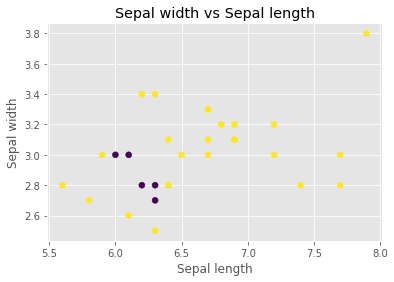

In [11]:
style.use('ggplot')
#sepal length vs sepal width
plt.plot()
plt.title('Sepal width vs Sepal length')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(train[-30:,0],train[-30:,1], c=testing_data_predict)

It only missed 5 point out of 30

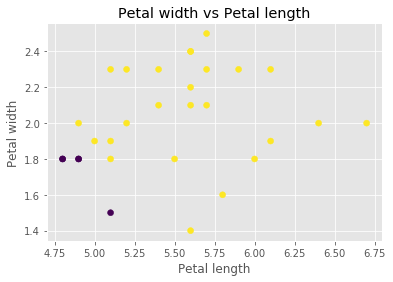

In [12]:
style.use('ggplot')
#petal length vs width
plt.plot()
plt.title('Petal width vs Petal length')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(train[-30:,2], train[-30:,3], c=testing_data_predict)

Using cross validation 

In [13]:
def accuracy(clf, x, y, folds):
    results = cross_val_predict(clf, x, y, cv=folds)
    return accuracy_score(y, results)

In [14]:
accuracy(clf,train,classes,5)

0.98

We got 98% of accuracy for this specific dataset, let's try a bigger one

### Now, we're going to use a Spotify dataset, trying to predict whether someone will like a music or not.

In [15]:
df = pd.read_csv('../datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [16]:
df['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

We can notice that likes and not likes (1 or 0) are quite balanced. Let's verify if we missed any value.

In [17]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

Let's check some statistics for our dataset.

In [18]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Plotting the dispersion graph to check outliers.

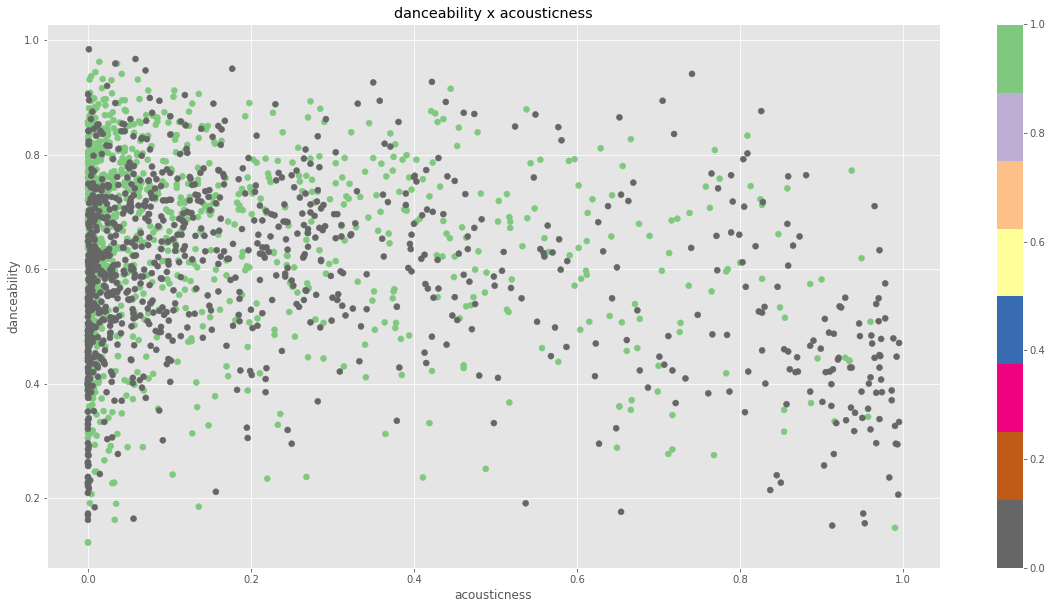

In [20]:
style.use('seaborn-colorblind')
plt.figure(figsize=(20, 10))
plt.plot()
plt.title('danceability x acousticness')
plt.xlabel('acousticness')
plt.ylabel('danceability')
df_ac = df['acousticness']
df_dance = df['danceability']
sc = plt.scatter(df_ac, df_dance, c=df['target'], cmap='Accent_r')
plt.colorbar(sc)